Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define Activation Function & Derivative

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

Initialize Dataset

In [3]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

Initialize Weights & Biases

In [4]:
np.random.seed(42)

input_size = 2
hidden_size = 2
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

Training Parameters

In [5]:
learning_rate = 0.5
epochs = 10000
loss_list = []

Training Loop (Forward + Backprop)

In [6]:
for epoch in range(epochs):
    
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(A1, W2) + b2
    y_hat = sigmoid(Z2)
    
    loss = np.mean((y - y_hat) ** 2)
    loss_list.append(loss)
    
    error_output = y_hat - y
    dZ2 = error_output * sigmoid_derivative(y_hat)
    
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    error_hidden = np.dot(dZ2, W2.T)
    dZ1 = error_hidden * sigmoid_derivative(A1)
    
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

Visualize Loss vs Epochs

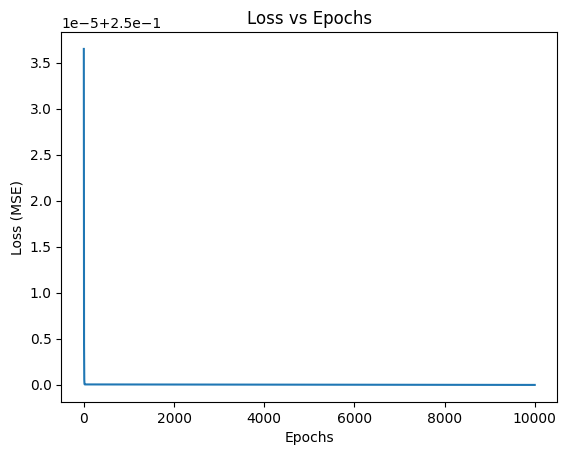

In [7]:
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.show()

Test the Model

In [8]:
test_input = np.array([[1, 0]])

Z1_test = np.dot(test_input, W1) + b1
A1_test = sigmoid(Z1_test)

Z2_test = np.dot(A1_test, W2) + b2
prediction = sigmoid(Z2_test)

print("Test Input:", test_input)
print("Predicted Output:", prediction)

Test Input: [[1 0]]
Predicted Output: [[0.50013347]]
